In [ ]:
!pip install yfinance

In [1]:
import yfinance as yf
import plotly.graph_objects as go
import numpy as np

spy = yf.download('cvx', start='1990-01-01', progress=False)['Adj Close']
spy = spy.resample('Y').last()
spy = spy.pct_change().dropna()
spy.index = spy.index.to_period('Y').astype(str)
spy = spy.reset_index()
spy.columns = ['date', 'ret']

trace = go.Scatter(
    x=spy.date,
    y=spy.ret,
        hovertemplate="%{x}<br>%{y:.1%}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="",
    yaxis_tickformat=".0%",
)

fig.show()

In [2]:
compound = (1+spy.ret).cumprod()

trace = go.Scatter(
    x=spy.date,
    y=compound,
        hovertemplate="%{x}<br>$%{y:.2f}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation from $1",
    yaxis_tickformat=".0f",
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="right", 
        x=0.99
    )
  )

fig.show()

In [3]:
r1 = np.cumprod([1] + 51*[1.1])
r2 = np.cumprod([1] + 30*[1.02] + 21*[1.1])
years = np.arange(1970, 2022)

trace1 = go.Scatter(
  x=years,
  y=r1,
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=r2,
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>accum = %{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation",
    yaxis_tickprefix="$", 
    yaxis_tickformat=",.0f",
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    )
)

fig.show()

In [4]:
trace1 = go.Scatter(
  x=years,
  y=np.log10(r1),
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=np.log10(r2),
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>log = %{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Log of Accumulation",
    yaxis_tickformat=",.1f",
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    )
)

fig.show()

In [5]:
trace1 = go.Scatter(
  x=years,
  y=r1,
  mode="lines",
  name="stock 1"
)

trace2 = go.Scatter(
  x=years,
  y=r2,
  mode="lines",
  name="stock 2"
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
string = "year %{x}<br>$%{y:.2f}"
fig.update_traces(hovertemplate=string)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation",
    yaxis_tickformat=",.0f",
    yaxis_type="log",
    yaxis_tickprefix="$",
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="left", 
        x=0.1
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 5, 10, 20, 50, 100],
    )
)

fig.show()

In [6]:
trace = go.Scatter(
    x=spy.date,
    y=compound,
        hovertemplate="%{x}<br>$%{y:.2f}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="Accumulation from $1",
    yaxis_tickformat=".0f",
    yaxis_type="log",
    yaxis = dict(
        tickmode = 'array',
        tickvals = [2, 5, 10, 16],
    )
  )

fig.show()

In [7]:
trace = go.Box(
    x=spy.ret,
    text=spy.date,
    hovertemplate="%{text}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    yaxis_title="",
    xaxis_title="Annual Return",
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
)

fig.show()

In [8]:
from scipy.stats import norm
from scipy.stats import gaussian_kde as kde

density = kde(spy.ret)
grid = np.linspace(np.min(spy.ret), np.max(spy.ret), 100)

trace1 = go.Scatter(
  x=grid,
  y=density(grid),
  mode="lines",
  name="actual"
)

trace2 = go.Scatter(
  x=grid, 
  y=norm.pdf(grid, np.mean(spy.ret), scale=np.std(spy.ret)), 
  mode="lines", 
  name="normal"
)
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Annual Return",
    yaxis_title="",
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="right", 
        x=0.99
    ),
)

fig.show()

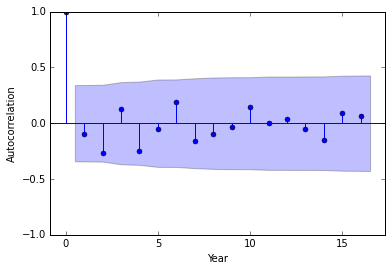

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plt.style.use('classic')
fig = plot_acf(spy.ret)
plt.xlabel("Year")
plt.ylabel("Autocorrelation")
_ = plt.title("")

In [10]:
import statsmodels.formula.api as smf
import plotly.io as pio
plotly_template = pio.templates["plotly_dark"]
colors = plotly_template.layout.colorway
blue = colors[0]

spy['lag'] = spy.ret.shift()
spy = spy.dropna()

trace = go.Scatter(
  x=spy.lag,
  y=spy.ret,
  text=spy.date,
  mode="markers",
  hovertemplate="%{text}<extra></extra>",
  showlegend=False,
)
fig = go.Figure(trace)

result = smf.ols("ret ~ lag", data=spy).fit()
predict = result.params['Intercept'] + result.params['lag']*spy.lag

trace = go.Scatter(
  x=spy.lag,
  y=predict,
  mode="lines",
  name="regression line",
  line=dict(color=blue)
)

fig.add_trace(trace)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Lagged Return",
    yaxis_title="Return",
    xaxis_tickformat=".0%",
    yaxis_tickformat=".0%",
)

fig.show()